In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()
base.prepare(autoload_with=engine)
# reflect the tables
base.classes.keys()


['measurement', 'station']

In [ ]:
# View all of the classes that automap found


In [6]:
# Save references to each table

measurement = base.classes.measurement
station = base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [11]:
# Find the most recent date in the data set.
min_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
print(min_date)

('2017-08-23',)


<AxesSubplot:xlabel='date'>

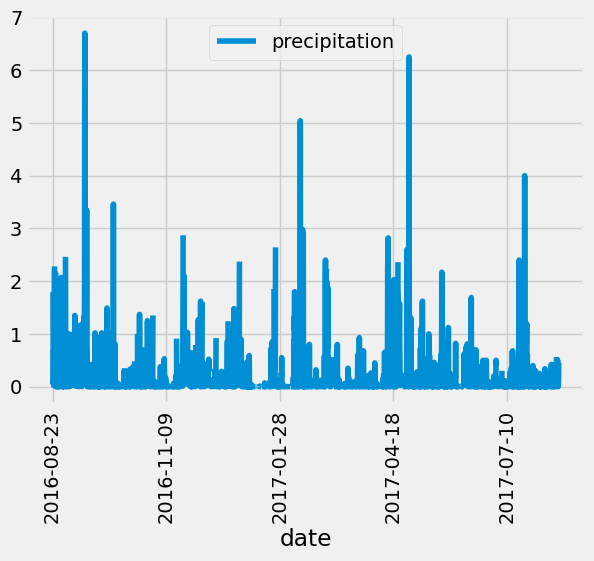

In [14]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Calculate the date one year from the last date in data set.
one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
precipitation = session.query(measurement.date, measurement.prcp).filter(measurement.date >= one_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
precip_dataframe = pd.DataFrame(precipitation, columns=['date', 'precipitation'])
precip_dataframe.set_index('date', inplace=True)

# Sort the dataframe by date
precip_dataframe = precip_dataframe.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
precip_dataframe.plot(rot=90)



In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precip_dataframe.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [17]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(station.station).count()
print(station_count)

9


In [18]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
count = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
print(count)


[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [19]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.

lowest_temp = session.query(func.min(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
highest_temp = session.query(func.max(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
average_temp = session.query(func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()

print(lowest_temp)
print(highest_temp)
print(average_temp)


[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


Text(0.5, 1.0, 'Temperature vs. Frequency Histogram')

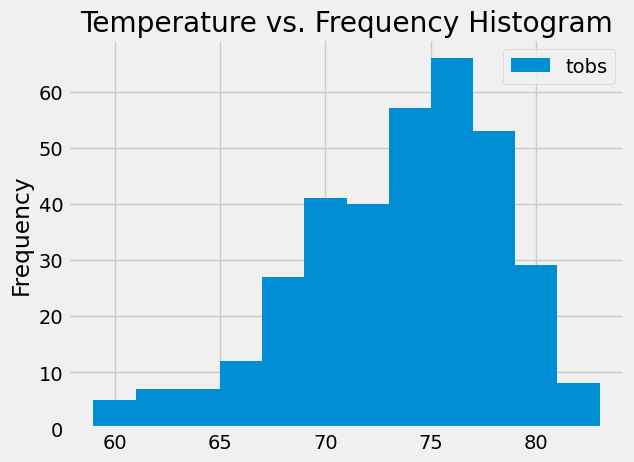

In [23]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

station_query = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= one_year).all()
station_df = pd.DataFrame(station_query, columns=['tobs'])
station_df.plot.hist(bins=12)

#Title the plot
plt.title("Temperature vs. Frequency Histogram")



# Close session

In [24]:
# Close Session
session.close()